In [33]:
# Need to prepare the news headlines in the same way as the training data
# Load the news headlines
import pandas as pd
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk

# # Preprocessing function
# def preprocess(textdata):
#     processedText = []
    
#     # Create Lemmatizer
#     wordLemm = WordNetLemmatizer()
    
#     # Defining regex patterns
#     urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
#     userPattern = '@[^\s]+'
#     alphaPattern = "[^a-zA-Z0-9]"
#     sequencePattern = r"(.)\1\1+"
#     seqReplacePattern = r"\1\1"
    
#     for tweet in textdata:
#         tweet = tweet.lower()
#         tweet = re.sub(urlPattern, 'URL', tweet)
#         tweet = re.sub(userPattern, 'USER', tweet)        
#         tweet = re.sub(alphaPattern, " ", tweet)
#         tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

#         tweetwords = ''
#         for word in tweet.split():
#             if len(word) > 1:
#                 word = wordLemm.lemmatize(word)
#                 tweetwords += (word + ' ')
            
#         processedText.append(tweetwords)
        
#     return processedText
def preprocess(input_series):
    result_series = input_series.copy()
    
    # Apply preprocessing steps to the series
    result_series = result_series.str.lower()  # Convert to lowercase
    result_series = result_series.str.replace("[^\w\s]", "", regex=True)  # Remove punctuation marks
    result_series = result_series.str.replace("\d+", "", regex=True)  # Remove numbers
    result_series = result_series.str.replace("\s+", " ", regex=True)  # Replace newlines and multiple spaces with a single space

    return result_series

import re
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def normalize(msg):
    msg = re.sub('[^A-Za-z]+', ' ', msg)  # remove special character and integers
    doc = nlp(msg)
    res = []
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2):  # word filtration
            pass
        else:
            res.append(token.lemma_.lower())
    return res

In [34]:
# load the data which is in this format ,title,date,stock

data = pd.read_csv('raw_analyst_ratings.csv')

data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [35]:

# Get just the news headlines for Apple stock
aapl_data = data[data['stock'] == 'AAPL']

aapl_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL


In [36]:
# Get the number of rows and columns
aapl_data.shape

(441, 6)

In [37]:
# Get the date range
print(aapl_data['date'].min())
print(aapl_data['date'].max())

2020-03-09 00:00:00
2020-06-10 11:33:26-04:00


In [38]:
# Get the 50 most stock with the most amount of datee
data['stock'].value_counts().head(50)

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
WFC     2612
BBRY    2580
BMY     2528
JCP     2516
LLY     2417
AGN     2408
CMG     2370
EWJ     2362
CAT     2322
GPRO    2303
TWX     2279
CHK     2246
GLD     2236
P       2234
LMT     2228
MCD     2228
FSLR    2222
NOK     2217
EA      2169
FCX     2162
MA      2152
PEP     2141
GPS     2127
XLF     2114
GRPN    2093
TM      2055
EWP     2027
HAL     2017
LOW     2013
ADBE    1999
Name: count, dtype: int64

In [39]:
# Im going to use the MS stock as it has a lot of dates
stock = "QQQ"
news_data = data[data['stock'] == stock]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ


In [40]:
news_data.shape

(3106, 6)

In [41]:
# Get the date range
print(news_data['date'].min())
print(news_data['date'].max())

2011-03-16 00:00:00
2020-06-10 12:12:25-04:00


In [42]:
# Get the top ten stocks with the most amount of unique dates
top_stocks = data.groupby('stock')['date'].nunique().sort_values(ascending=False).head(10)
print(top_stocks)

stock
MRK     1615
KO      1407
MS      1392
JNJ     1378
DAL     1357
GILD    1335
VZ      1315
M       1298
BMY     1288
GLD     1224
Name: date, dtype: int64


In [43]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,"Stocks Grind Higher On Wednesday (SPY, QQQQ, G...",https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,"Doug Kass Shorting Broader ETFs (IWM, SPY, QQQ)",https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,"Reminder: QQQQ Changes To QQQ Today (QQQQ, QQQ)",https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,PowerShares QQQ Ticker to Change from ‘QQQQ' t...,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [44]:
# Apply the preprocessing function to the news headlines
# news_data["headline"] = news_data["headline"].apply(normalize)
news_data['headline'] = preprocess(news_data['headline'])

/tmp/ipykernel_92231/877094195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['headline'] = preprocess(news_data['headline'])


In [45]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,stocks grind higher on wednesday spy qqqq gld ...,https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,doug kass shorting broader etfs iwm spy qqq,https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,reminder qqqq changes to qqq today qqqq qqq,https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,powershares qqq ticker to change from qqqq to qqq,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [46]:
# Load the historical financial data
stock_data = pd.read_csv(f'stock_data/{stock}_historical_data.csv')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100


In [48]:
# Predict the sentiment for the news headlines using the model



import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


# Predict the sentiment using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

use_vader = False

import os
import pickle
# List all of the models in the models directory
available_models = os.listdir('models')


# Store the VADER scores in `compound`
if use_vader:
    news_data['Sentiment'] = [vader.polarity_scores(v)['compound'] for v in news_data['headline']]
else:
    for model_name in available_models:
        # Load the model
        model = pickle.load(open(f'models/{model_name}', 'rb'))
        # Predict the sentiment 
        print(model_name)
        if model_name == 'finbert_pipeline':
            news_data[f'Sentiment_{model_name.split("_pipeline")[0]}'] = model.predict(news_data['headline'].to_list())
        else:
            news_data[f'Sentiment_{model_name.split("_pipeline")[0]}'] = model.predict(news_data['headline'])

news_data['Sentiment_VADER'] = [(vader.polarity_scores(v)['compound'] + 1) / 2 for v in news_data['headline']]

available_models = [f'Sentiment_{model_name.split("_pipeline")[0]}' for model_name in available_models]

available_models.append('Sentiment_VADER')

news_data.head()

DecisionTreeClassifier_pipeline.pkl


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/calnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipykernel_92231/916259329.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data[f'Sentiment_{model_name.split("_pipeline")[0]}'] = model.predict(news_data['headline'])


AttributeError: Can't get attribute 'FinbertClassifier' on <module '__main__'>

In [100]:
news_data['Sentiment_VADER'] = [(vader.polarity_scores(v)['compound'] + 1) / 2 for v in news_data['headline']]

/tmp/ipykernel_75166/4135061665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['Sentiment_VADER'] = [(vader.polarity_scores(v)['compound'] + 1) / 2 for v in news_data['headline']]


In [101]:
available_models

['Sentiment_DecisionTreeClassifier',
 'Sentiment_LogisticRegression',
 'Sentiment_KNeighborsClassifier',
 'Sentiment_MultinomialNB',
 'Sentiment_SGDClassifier',
 'Sentiment_GradientBoostingClassifier',
 'Sentiment_XGBClassifier',
 'Sentiment_RandomForestClassifier',
 'Sentiment_VADER']

In [102]:
for model in available_models:
    print(news_data[model].value_counts())

Sentiment_DecisionTreeClassifier
1    2964
0     142
Name: count, dtype: int64
Sentiment_LogisticRegression
1    2750
0     356
Name: count, dtype: int64
Sentiment_KNeighborsClassifier
1    3012
0      94
Name: count, dtype: int64
Sentiment_MultinomialNB
1    2576
0     530
Name: count, dtype: int64
Sentiment_SGDClassifier
1    2661
0     445
Name: count, dtype: int64
Sentiment_GradientBoostingClassifier
1    2957
0     149
Name: count, dtype: int64
Sentiment_XGBClassifier
1    2892
0     214
Name: count, dtype: int64
Sentiment_RandomForestClassifier
1    2898
0     208
Name: count, dtype: int64
Sentiment_VADER
0.50000    2431
0.39885      94
0.35200      60
0.75530      34
0.67000      24
           ... 
0.69020       1
0.86345       1
0.72085       1
0.42755       1
0.55225       1
Name: count, Length: 132, dtype: int64


In [103]:
news_data['date'] = news_data['date'].str.split(' ').str[0]

news_data.head()

/tmp/ipykernel_75166/3699471706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['date'] = news_data['date'].str.split(' ').str[0]


,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_DecisionTreeClassifier,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,QQQ,1,1,1,0,1,1,1,1,0.5000
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,QQQ,1,1,1,1,1,1,1,1,0.5000
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09,QQQ,1,1,1,0,1,1,1,1,0.5000
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09,QQQ,1,1,1,1,1,1,1,1,0.7202
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09,QQQ,1,1,1,1,1,1,1,1,0.5000


In [104]:
# Map the sentiment to numerical values
# if not use_vader:
#     sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
#     news_data['Sentiment'] = news_data['Sentiment'].map(sentiment_mapping)

# Convert the 'date' column to datetime and extract the date part
news_data['date'] = pd.to_datetime(news_data['date']).dt.date

# Aggregate sentiment by date
# Here, you can calculate the average sentiment score for each day

daily_sentiments = {}

for model in available_models:
    daily_sentiments[model] = news_data.groupby('date')[model].min()
    # Rename date column to 'Date"
    # daily_sentiments[model].rename(columns={'date': 'Date'})


# average_daily_sentiment = news_data.groupby('date')['Sentiment'].min()

# Convert to DataFrame for merging
# average_daily_sentiment = average_daily_sentiment.reset_index()

daily_sentiments
# average_daily_sentiment.head()

/tmp/ipykernel_75166/3067861720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['date'] = pd.to_datetime(news_data['date']).dt.date


{'Sentiment_DecisionTreeClassifier': date
 2011-03-16    1
 2011-03-23    1
 2011-03-25    1
 2011-03-28    0
 2011-03-29    0
              ..
 2020-06-01    0
 2020-06-05    1
 2020-06-08    1
 2020-06-09    1
 2020-06-10    1
 Name: Sentiment_DecisionTreeClassifier, Length: 1104, dtype: int64,
 'Sentiment_LogisticRegression': date
 2011-03-16    0
 2011-03-23    0
 2011-03-25    1
 2011-03-28    0
 2011-03-29    0
              ..
 2020-06-01    1
 2020-06-05    1
 2020-06-08    1
 2020-06-09    1
 2020-06-10    1
 Name: Sentiment_LogisticRegression, Length: 1104, dtype: int64,
 'Sentiment_KNeighborsClassifier': date
 2011-03-16    1
 2011-03-23    1
 2011-03-25    1
 2011-03-28    0
 2011-03-29    1
              ..
 2020-06-01    1
 2020-06-05    1
 2020-06-08    1
 2020-06-09    1
 2020-06-10    1
 Name: Sentiment_KNeighborsClassifier, Length: 1104, dtype: int64,
 'Sentiment_MultinomialNB': date
 2011-03-16    0
 2011-03-23    0
 2011-03-25    1
 2011-03-28    0
 2011-03-29    0


In [105]:
# Merge with stock data

# Ensure the stock data's 'Date' column is in the correct format
# stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Remame the date column from average_daily_sentiment to 'Date'
# average_daily_sentiment = average_daily_sentiment.rename(columns={'date': 'Date'})

for model in available_models:
    # Rename the columns to 'Date' and 'Sentiment'
    daily_sentiments[model] = daily_sentiments[model].reset_index().rename(columns={'date': 'Date', model: 'Sentiment'})

# average_daily_sentiment
daily_sentiments

{'Sentiment_DecisionTreeClassifier':             Date  Sentiment
 0     2011-03-16          1
 1     2011-03-23          1
 2     2011-03-25          1
 3     2011-03-28          0
 4     2011-03-29          0
 ...          ...        ...
 1099  2020-06-01          0
 1100  2020-06-05          1
 1101  2020-06-08          1
 1102  2020-06-09          1
 1103  2020-06-10          1
 
 [1104 rows x 2 columns],
 'Sentiment_LogisticRegression':             Date  Sentiment
 0     2011-03-16          0
 1     2011-03-23          0
 2     2011-03-25          1
 3     2011-03-28          0
 4     2011-03-29          0
 ...          ...        ...
 1099  2020-06-01          1
 1100  2020-06-05          1
 1101  2020-06-08          1
 1102  2020-06-09          1
 1103  2020-06-10          1
 
 [1104 rows x 2 columns],
 'Sentiment_KNeighborsClassifier':             Date  Sentiment
 0     2011-03-16          1
 1     2011-03-23          1
 2     2011-03-25          1
 3     2011-03-28          0
 

In [106]:
daily_sentiments

{'Sentiment_DecisionTreeClassifier':             Date  Sentiment
 0     2011-03-16          1
 1     2011-03-23          1
 2     2011-03-25          1
 3     2011-03-28          0
 4     2011-03-29          0
 ...          ...        ...
 1099  2020-06-01          0
 1100  2020-06-05          1
 1101  2020-06-08          1
 1102  2020-06-09          1
 1103  2020-06-10          1
 
 [1104 rows x 2 columns],
 'Sentiment_LogisticRegression':             Date  Sentiment
 0     2011-03-16          0
 1     2011-03-23          0
 2     2011-03-25          1
 3     2011-03-28          0
 4     2011-03-29          0
 ...          ...        ...
 1099  2020-06-01          1
 1100  2020-06-05          1
 1101  2020-06-08          1
 1102  2020-06-09          1
 1103  2020-06-10          1
 
 [1104 rows x 2 columns],
 'Sentiment_KNeighborsClassifier':             Date  Sentiment
 0     2011-03-16          1
 1     2011-03-23          1
 2     2011-03-25          1
 3     2011-03-28          0
 

In [107]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100
...,...,...,...,...,...,...,...
2319,2020-06-03,236.259995,237.470001,235.350006,236.690002,231.988998,37228700
2320,2020-06-04,236.330002,237.789993,233.679993,235.029999,230.361969,38716100
2321,2020-06-05,236.220001,240.300003,235.630005,239.690002,234.929443,47365600
2322,2020-06-08,239.539993,241.679993,237.910004,241.550003,236.752518,32937300


In [108]:
# Convert the 'Date' columns to datetime in both dataframes
for model in available_models:
    daily_sentiments[model]['Date'] = pd.to_datetime(daily_sentiments[model]['Date'])
# average_daily_sentiment['Date'] = pd.to_datetime(average_daily_sentiment['Date'])


stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Initialize an empty DataFrame for all sentiment scores
all_sentiments = pd.DataFrame()

# Merge sentiment scores from each model into the all_sentiments DataFrame
for model in available_models:
    # Rename the sentiment column to include the model name
    sentiment_data = daily_sentiments[model].rename(columns={'Sentiment': f'Sentiment_{model.split("_")[1]}'})
    
    if all_sentiments.empty:
        all_sentiments = sentiment_data
    else:
        all_sentiments = all_sentiments.merge(sentiment_data, on='Date', how='outer')

# Now merge the combined sentiment scores with the stock data
merged_df = stock_data.merge(all_sentiments, on='Date', how='left')

# Display the merged DataFrame


# Save the data
merged_df.to_csv(f'stock_data_wtih_features/{stock}_data_with_sentiment.csv', index=False)

In [109]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.5
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2020-06-03,236.259995,237.470001,235.350006,236.690002,231.988998,37228700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2320,2020-06-04,236.330002,237.789993,233.679993,235.029999,230.361969,38716100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,2020-06-05,236.220001,240.300003,235.630005,239.690002,234.929443,47365600,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5
2322,2020-06-08,239.539993,241.679993,237.910004,241.550003,236.752518,32937300,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5


In [110]:
import pandas as pd

# Assuming merged_df is your final merged DataFrame

# Add a another column to the data called 'Sentiment_Random' and fill it with random values either 0 or 1
merged_df['Sentiment_Random'] = np.random.randint(2, size=len(merged_df))

# Add it to the available models list
available_models.append('Sentiment_Random')

# Initialize a DataFrame to store correlations
correlations = pd.DataFrame(columns=['Model', 'Correlation'])

# Calculate and store correlations for each model
for model in available_models:
    correlation = merged_df[['Close', model]].corr().iloc[0, 1]
    new_row = pd.DataFrame({'Model': [model], 'Correlation': [correlation]})
    correlations = pd.concat([correlations, new_row], ignore_index=True)

# Sort the DataFrame by correlation in descending order
correlations_sorted = correlations.sort_values(by='Correlation', ascending=False)

# Display the sorted correlations
correlations_sorted


,Model,Correlation
3,Sentiment_MultinomialNB,0.283652
4,Sentiment_SGDClassifier,0.207873
2,Sentiment_KNeighborsClassifier,0.207872
6,Sentiment_XGBClassifier,0.198673
7,Sentiment_RandomForestClassifier,0.198028
5,Sentiment_GradientBoostingClassifier,0.165194
1,Sentiment_LogisticRegression,0.164437
8,Sentiment_VADER,0.149106
0,Sentiment_DecisionTreeClassifier,0.147403
9,Sentiment_Random,0.002228


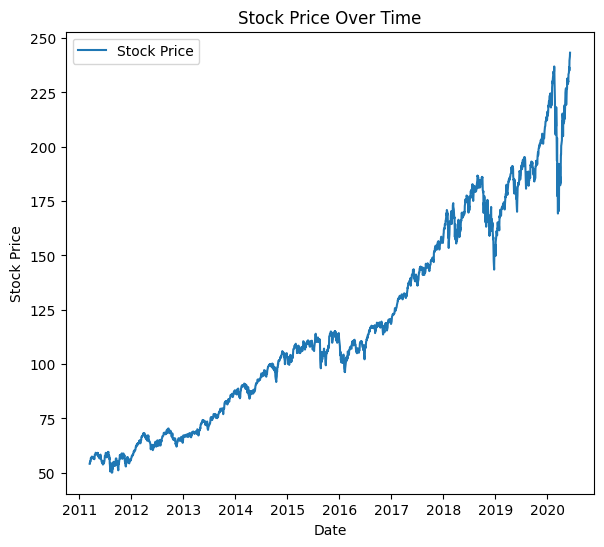

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Average Sentiment', color='orange')
# plt.xlabel('Date')
# plt.ylabel('Average Sentiment')
# plt.title('Average Sentiment Over Time')
# plt.legend()

# plt.tight_layout()
plt.show()


In [112]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER,Sentiment_Random
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.5,1
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2020-06-03,236.259995,237.470001,235.350006,236.690002,231.988998,37228700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2320,2020-06-04,236.330002,237.789993,233.679993,235.029999,230.361969,38716100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2321,2020-06-05,236.220001,240.300003,235.630005,239.690002,234.929443,47365600,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,0
2322,2020-06-08,239.539993,241.679993,237.910004,241.550003,236.752518,32937300,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1


In [113]:
# merged_df['Sentiment'].value_counts()

In [114]:
n = merged_df['Sentiment_VADER'].to_list()

In [115]:
print(n)

[0.5, nan, nan, nan, nan, 0.5, nan, 0.5, 0.21405000000000002, 0.352, nan, 0.5, 0.79295, 0.5, 0.5, 0.5, 0.5, 0.352, 0.39885, nan, nan, nan, 0.5, nan, 0.67, 0.5, 0.5, 0.352, nan, 0.5, 0.5, nan, nan, nan, 0.39885, 0.23665000000000003, nan, 0.7553000000000001, 0.5, 0.44865, 0.5, 0.39885, 0.21405000000000002, 0.23665000000000003, 0.5, 0.39885, 0.39885, 0.39885, 0.39885, 0.5, 0.352, 0.42345, 0.2798, 0.17570000000000002, 0.352, 0.08875, 0.21405000000000002, 0.352, 0.352, 0.19379999999999997, 0.20029999999999998, 0.18980000000000002, 0.3409, 0.16475, 0.30910000000000004, 0.21405000000000002, 0.30910000000000004, 0.3634, 0.3194, 0.17015000000000002, 0.352, 0.5, 0.5, 0.352, 0.5, 0.5, 0.352, 0.352, 0.5, 0.352, 0.39885, 0.5, 0.39885, 0.22885, 0.17015000000000002, 0.1175, 0.5, 0.28925, 0.3194, 0.32999999999999996, 0.5, 0.3409, 0.39885, 0.352, 0.26165, 0.24469999999999997, 0.21405000000000002, 0.24469999999999997, 0.39885, 0.24469999999999997, 0.39885, 0.32999999999999996, 0.5, 0.5, 0.23665000000000

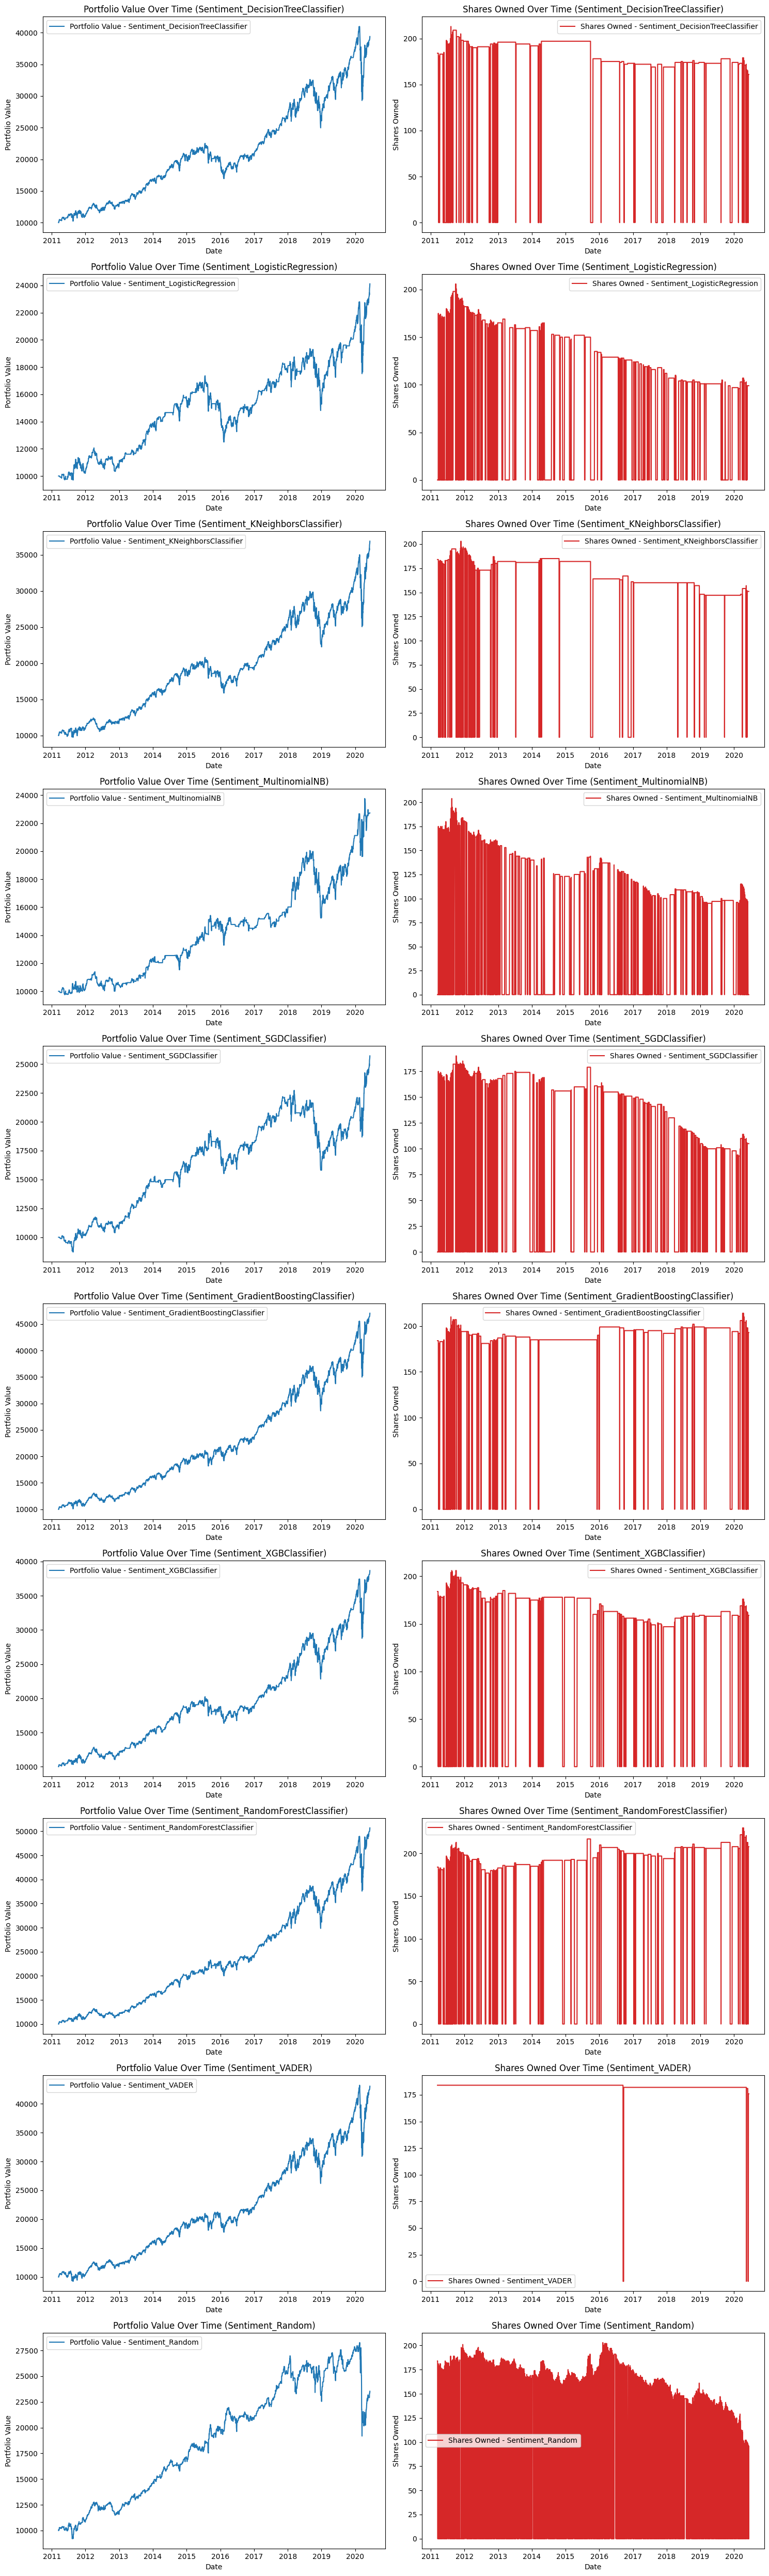

In [116]:
import matplotlib.pyplot as plt

# Determine the number of models
num_models = len(available_models)

# Initialize subplots - two columns for each model, one for portfolio value and one for shares owned
fig, axes = plt.subplots(nrows=num_models, ncols=2, figsize=(15, 5 * num_models))

final_portfolio_values = {}

# Iterate over each sentiment analysis model and plot data
for i, model in enumerate(available_models):
    # Initialize portfolio
    cash = 10000
    shares_owned = 0
    portfolio_values = []
    shares_history = []  # To track the number of shares owned over time

    sentiment_column = f'Sentiment_{model.split("_")[1]}'

    # Iterate over each day in the merged data
    for index, row in merged_df.iterrows():
        stock_price = row['Close']
        sentiment = row[sentiment_column]

        if sentiment > 0.05:  # Buy
            if cash > 0:
                # Buy as many shares as possible
                shares_bought = cash // stock_price
                cash -= shares_bought * stock_price
                shares_owned += shares_bought

        elif sentiment <= 0.05:  # Sell
            if shares_owned > 0:
                # Sell all shares
                cash += shares_owned * stock_price
                shares_owned = 0

        # Update portfolio value (cash + value of owned shares)
        portfolio_value = cash + (shares_owned * stock_price)
        portfolio_values.append(portfolio_value)
        shares_history.append(shares_owned)  # Record the number of shares owned

    final_portfolio_values[model] = portfolio_value

    # Plot the portfolio value over time for the current model
    axes[i, 0].plot(merged_df['Date'], portfolio_values, label=f'Portfolio Value - {model}', color='tab:blue')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Portfolio Value')
    axes[i, 0].set_title(f'Portfolio Value Over Time ({model})')
    axes[i, 0].legend()

    # Plot the number of shares owned over time for the current model
    axes[i, 1].plot(merged_df['Date'], shares_history, label=f'Shares Owned - {model}', color='tab:red')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Shares Owned')
    axes[i, 1].set_title(f'Shares Owned Over Time ({model})')
    axes[i, 1].legend()


# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [117]:
portfolio_values_df = pd.DataFrame.from_dict(final_portfolio_values, orient='index', columns=['Portfolio Value'])
portfolio_values_df = portfolio_values_df.sort_values(by='Portfolio Value', ascending=False)
print(portfolio_values_df)

                                      Portfolio Value
Sentiment_RandomForestClassifier         50700.209719
Sentiment_GradientBoostingClassifier     47056.188502
Sentiment_VADER                          43043.108906
Sentiment_DecisionTreeClassifier         39395.456155
Sentiment_XGBClassifier                  38685.472519
Sentiment_KNeighborsClassifier           36886.441396
Sentiment_SGDClassifier                  25715.931338
Sentiment_LogisticRegression             24112.967211
Sentiment_Random                         23537.336568
Sentiment_MultinomialNB                  22735.027589


In [118]:
correlations_sorted

,Model,Correlation
3,Sentiment_MultinomialNB,0.283652
4,Sentiment_SGDClassifier,0.207873
2,Sentiment_KNeighborsClassifier,0.207872
6,Sentiment_XGBClassifier,0.198673
7,Sentiment_RandomForestClassifier,0.198028
5,Sentiment_GradientBoostingClassifier,0.165194
1,Sentiment_LogisticRegression,0.164437
8,Sentiment_VADER,0.149106
0,Sentiment_DecisionTreeClassifier,0.147403
9,Sentiment_Random,0.002228


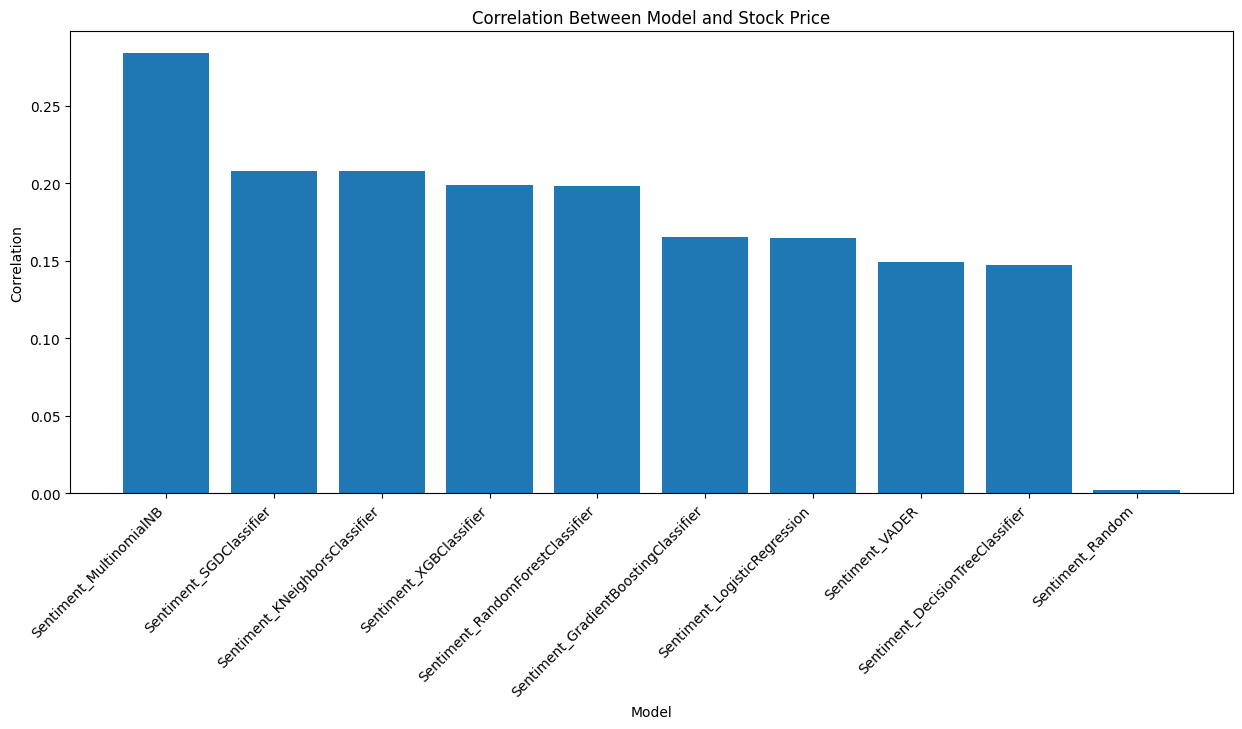

In [119]:
# Plot the correlations
# Plot the correlations
plt.figure(figsize=(15, 6))
plt.bar(correlations_sorted['Model'], correlations_sorted['Correlation'])
plt.xlabel('Model')
plt.ylabel('Correlation')
plt.title('Correlation Between Model and Stock Price')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.show()